<a href="https://colab.research.google.com/github/dretcm/Machine-Learning-ACM/blob/main/ML_theory_with_TechwithTim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**************************************************************
**************************************************************
### **1. first Theme: Linear Regression**
**************************************************************
**************************************************************
Cuando se usa regresion linear un conjunto de datos en un plano carteciano, donde se tiene una pendiente(m) y intercepta(b) en un cierto punto con el eje Y, se dara un valor donde se posicionara en el eje X, y usando la formula " Y = mX + b ", nos dara un valor para cada dato, y asi encontrando una mejor version para nuestro modelo segun el posicionamiento de la pendiente.

![alt text](http://techwithtim.net/wp-content/uploads/2019/01/linear-2.png)

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

from google.colab import files

import matplotlib.pyplot as plt
from matplotlib import style
import pickle

files.upload()
files.upload()

In [ ]:
data = pd.read_csv("student-mat.csv",sep=";")
data.head(10)

In [ ]:
#data.shape
#data.isna()
# now,we´ll trimming our data, exists data relevant and not relevant, for this we´ll trimming the important data.
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data.head()

In [ ]:
predict = "G3"
# separate data, with "X" how features and "y" how Labels.
X = np.array(data.drop([predict],1))
y = np.array(data[predict])
dataf = pd.DataFrame(X,columns=data.columns.drop(predict))
dataf.head()

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.1)
# dividimos la data en data de entrenamiento y prueba
# hacemos esto para probar nuestro modelo con datos que no ha visto

linear = linear_model.LinearRegression()   #definimos el modelo a usar, en este caso es regresion linear
linear.fit(X_train,y_train)   # entrenamos la data
accuracy = linear.score(X_test,y_test)   # y obtendremos el total o promedio de exactitud a la hora de hacer la prediccion
print(" Accuracy: ",int(accuracy*100),"%")

print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

In [ ]:
predictions = linear.predict(X_test) # Gets a list of all predictions
# print(X_test,y_test)
for x in range(len(predictions)):     #donde se muestra la prediccion, las caracteristicas de prueba, y las etiquetas o respuestasa verdaderas.
    print(predictions[x], X_test[x], y_test[x])

In [ ]:
new_data = np.array([y_test,predictions])
dataf = pd.DataFrame(new_data,index=["G3","G3_new"])
dataf.head()


In [ ]:
with open("student_grades.pickle","wb") as f:
  pickle.dump(linear,f)

pickle_in = open("student_grades.pickle","rb")
linear = pickle.load(pickle_in)


In [ ]:
best = 0.0
for _ in range(20):
  X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.1)

  linear = linear_model.LinearRegression()
  linear.fit(X_train,y_train)

  accuracy = linear.score(X_test,y_test)
  print(" Accuracy: ",int(accuracy*100)," % ")

  if accuracy > best:
    best = accuracy
    with open("student_grades.pickle","wb") as f:
      pickle.dump(linear,f)

print("\n Best Accuracy => ",int(best*100)," % ")  

In [ ]:
# Drawing and plotting model
style.use("ggplot")
plot = "G1" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"],) 
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

**************************************************************
**************************************************************
### **2.Second Theme: K-Nearest Neightbors**
**************************************************************
**************************************************************
Usar k-NN, o el vecino mas cercano, es una buena opcion cuando manejaremos un conjunto de data pequeña, pero a medida que la data cresca o sea muy extensa con millones de datos esto sera muy costoso computacionalmente, ya que en K-NN comprueba la distancia entre los puntos de los datos con cada punto de la data de entrenamiento para hacer la prediccion, y que cada punto de la data de entrenamiento este calculando la distancia con millones de datos hace que el 
proceso sea muy lento. 

Otro problema es la carga de datos a la memoria para hacer la prediccion, como son millones de datos subirlos consumira mucho tiempo.

![alt text](http://techwithtim.net/wp-content/uploads/2019/01/ml-3.png)



In [ ]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing

from google.colab import files

files.upload()


Saving car.data to car.data


{'car.data': b'buying,maint,door,persons,lug_boot,safety,class\nvhigh,vhigh,2,2,small,low,unacc\nvhigh,vhigh,2,2,small,med,unacc\nvhigh,vhigh,2,2,small,high,unacc\nvhigh,vhigh,2,2,med,low,unacc\nvhigh,vhigh,2,2,med,med,unacc\nvhigh,vhigh,2,2,med,high,unacc\nvhigh,vhigh,2,2,big,low,unacc\nvhigh,vhigh,2,2,big,med,unacc\nvhigh,vhigh,2,2,big,high,unacc\nvhigh,vhigh,2,4,small,low,unacc\nvhigh,vhigh,2,4,small,med,unacc\nvhigh,vhigh,2,4,small,high,unacc\nvhigh,vhigh,2,4,med,low,unacc\nvhigh,vhigh,2,4,med,med,unacc\nvhigh,vhigh,2,4,med,high,unacc\nvhigh,vhigh,2,4,big,low,unacc\nvhigh,vhigh,2,4,big,med,unacc\nvhigh,vhigh,2,4,big,high,unacc\nvhigh,vhigh,2,more,small,low,unacc\nvhigh,vhigh,2,more,small,med,unacc\nvhigh,vhigh,2,more,small,high,unacc\nvhigh,vhigh,2,more,med,low,unacc\nvhigh,vhigh,2,more,med,med,unacc\nvhigh,vhigh,2,more,med,high,unacc\nvhigh,vhigh,2,more,big,low,unacc\nvhigh,vhigh,2,more,big,med,unacc\nvhigh,vhigh,2,more,big,high,unacc\nvhigh,vhigh,3,2,small,low,unacc\nvhigh,vhigh,

In [ ]:
data = pd.read_csv("car.data")
data.head()

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
Le = preprocessing.LabelEncoder()

elements = ["buying",	"maint", "door",	"persons",	"lug_boot",	"safety",	"class"]

for i in range(len(elements)):
  data[elements[i]] = Le.fit_transform(data[elements[i]])

data.head()

,buying,maint,door,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [ ]:
predict = "class"
X = np.array(data.drop([predict],1))
y = np.array(data[predict])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.1)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=9)

model.fit(X_train,y_train)

acc = model.score(X_test,y_test)
print("Accuracy: ",int(acc*100),"%")

Accuracy:  91 %


In [ ]:
predicted = model.predict(X_test)
names = ["unacc", "acc", "good", "vgood"]

for x in range(len(predicted)):
    print("Predicted: ", names[predicted[x]], "Data: ", X_test[x], "Actual: ", names[y_test[x]])
    # muestra primero la distacia entre cada dato de entrenamiento y la data, y el otro array el indice de los datos.
    n = model.kneighbors([X_test[x]], 9, True)
    print("N: ", n)

Predicted:  good Data:  [0 3 1 1 0 0] Actual:  good
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[ 703,  320, 1486,   63,  624, 1171, 1204,  749,  744]]))
Predicted:  good Data:  [3 1 1 2 0 1] Actual:  good
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[ 358,  753, 1480,  285,  776,  740,  648, 1041,  726]]))
Predicted:  unacc Data:  [0 1 0 1 2 0] Actual:  unacc
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[1075,  637, 1406, 1131, 1053, 1442, 1081,  908,  883]]))
Predicted:  good Data:  [0 3 2 0 0 1] Actual:  good
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[1515,  763,  564,  300,  972,  494,  924, 1027,  811]]))
Pr


**************************************************************
**************************************************************
### **3. third Theme: support vector machines(SVM)**
**************************************************************
**************************************************************
El uso de una maquina de sorporte de matrices(SVM) es el mismo o tiene el mismo fin que usar K-NN, ya que ambas clasifican la data, pero con diferencia que SVM puede clasificar datos mas extensos que K-NN, y no permite clasificar datos que se encuentren o tengan una correspondencia lineal, para K-NN clasificar datos de forma no lineal(figura) nos retornaria un accuracy muy bajo, y ahi es donde dentra a trabajar SVM.

![alt text](http://techwithtim.net/wp-content/uploads/2019/01/svm-data.png)

Como funciona? link = https://techwithtim.net/tutorials/machine-learning-python/svm-2/

In [ ]:
import sklearn
from sklearn import svm
from sklearn import datasets

cancer = datasets.load_breast_cancer()

print(cancer.feature_names)
print(cancer.target_names)

In [ ]:
x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.2)

print(x_train[:5], y_train[:5])

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

clf = svm.SVC(kernel="linear",C=2)

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test,y_pred)

print(" Accuracy: ",int(acc*100),"%")

**************************************************************
**************************************************************
### **4. fourth Theme: K-Means Clustering**
**************************************************************
**************************************************************
Como funciona?, a diferencia de otros algoritmos de aprendizaje donde se envia los datos y etiquetas(aprendizaje supervisado), k-means NO es un algoritmo de aprendizaje supevisado, o sea que solo enviaremos los datos ya no las etiquetas o labels. 
pasos para que k-means se desarrolle:

Paso 1 : Seleccione aleatoriamente K puntos para colocar K centroides.

Paso 2 : Asigne todos los puntos de datos a los centroides por distancia. El centroide más cercano a un punto es aquel al que está asignado.

Paso 3: promedia todos los puntos que pertenecen a cada centroide para encontrar el centro de esos grupos (centro de masa). Coloque los centroides correspondientes en esa posición.

Paso 4 : reasigne cada punto una vez más al centroide más cercano.

Paso 5 : repita los pasos 3-4 hasta que ningún punto cambie a qué centroide pertenece.

link visualizacion: https://techwithtim.net/tutorials/machine-learning-python/k-means-1/

In [ ]:
import numpy as np
import sklearn
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics

digits = load_digits()
data = scale(digits.data)
y = digits.target
#k = len(np.unique(y))
k = 10
samples, features = data.shape

In [ ]:
def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

In [ ]:
clf = KMeans(n_clusters=k, init="random", n_init=10)
bench_k_means(clf, "1", data)

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)


print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**************************************************************
**************************************************************
### **5. Fifth Topic: Neural Networks**
**************************************************************
**************************************************************
Entonces, ¿qué es una red neuronal? Cuando la mayoría de las personas se entera de una red neuronal, piensa en una caja negra mágica que es capaz de resolver problemas muy complicados. En realidad, una red neuronal es solo una fórmula matemática muy elegante, más o menos. Una red neuronal está inspirada biológicamente y lleva el nombre de la red de neuronas que existen en su cerebro. Una red neuronal es simplemente un grupo de neuronas conectadas, hay algunas neuronas de entrada, algunas neuronas de salida y un grupo de lo que llamamos neuronas ocultas en el medio. Cuando alimentamos información a las neuronas de entrada, obtenemos información de las neuronas de salida. La información comienza en las neuronas de entrada y viaja a las siguientes capas de neuronas que tienen lo que se llama un peso y un sesgo aplicado. Estos pesos y sesgos comienzan de forma aleatoria y se modifican a medida que la red aprende y ve más datos.
![alt text](https://techwithtim.net/wp-content/uploads/2019/05/1_3w6P6OHcU3j0T_lRUmnjQw.jpeg)

In [ ]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.0
test_images = test_images/255.0

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.53787005e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.38331411e-04 1.35332564e-03 2.89119569e-03
  2.64513649e-03 2.02998847e-03 1.92233756e-03 2.16839677e-03
  3.06036140e-03 2.19915417e-03 1.38408304e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.53787005e-05 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.53787005e-05
  0.00000000e+00 0.00000000e+00 3.07574010e-04 2.01460977e-03
  3.06036140e-03 3.16801230e-03 3.01422530e-03 3.10649750e-03
  3.72164552e-03 3.92156863e-03 3.92156863e-03 3.84467512e-03
  3.41407151e-03 3.02960400e-03 3.16801230e-03 2.89119569e-03
  1.93771626e-03 2.61437908e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.53787005e-05
  0.00000000e+00 5.38254517e-04 3.29104191e-03 2.93733180e-03
  2.81

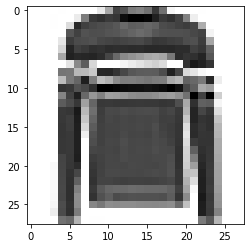

In [ ]:
print(train_images[5])
plt.imshow(train_images[5], cmap=plt.cm.binary)
plt.show()

In [ ]:
model = keras.Sequential([
	keras.layers.Flatten(input_shape=(28,28)),
	keras.layers.Dense(128, activation="relu"),
	keras.layers.Dense(10, activation="softmax")
	])

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1008 - accuracy: 0.6592
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6451 - accuracy: 0.7671
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5686 - accuracy: 0.7963
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5262 - accuracy: 0.8137
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4986 - accuracy: 0.8243


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', int(test_acc*100),"%")

313/313 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.8154

Test accuracy: 81 %


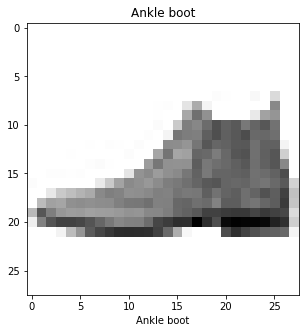

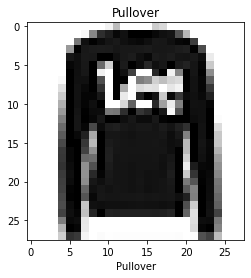

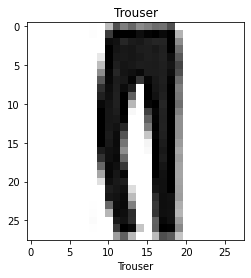

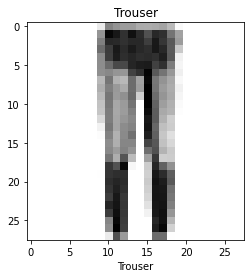

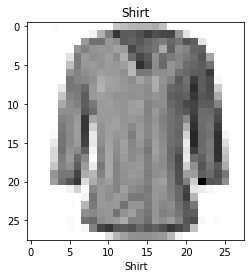

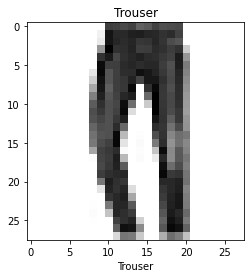

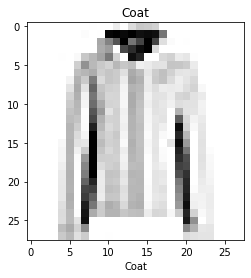

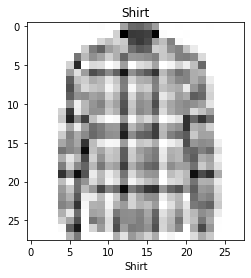

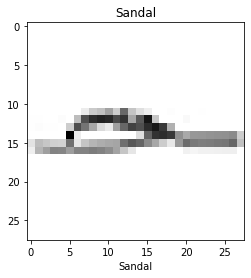

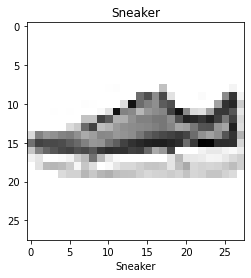

In [ ]:
predictions = model.predict(test_images)

plt.figure(figsize=(5,5))
for i in range(10):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
    plt.title(class_names[np.argmax(predictions[i])])
    plt.show()

## Ejemplo 1. Reseña de peliculas: 


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy

imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
_word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in _word_index.items()}

word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
	return " ".join([reverse_word_index.get(i, "?") for i in text])
 
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding="post", maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding="post", maxlen=250)

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(88000, 16))  # diferencia las palabras vectorizandolas
model.add(keras.layers.GlobalAveragePooling1D())  # reduce el coste computacional de embedding
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()  # prints a summary of the model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          1408000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,408,289
Trainable params: 1,408,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

fitModel = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

results = model.evaluate(test_data, test_labels)
print(results)

Epoch 1/40
30/30 [==============================] - 1s 34ms/step - loss: 0.6918 - accuracy: 0.5047 - val_loss: 0.6897 - val_accuracy: 0.5118
Epoch 2/40
30/30 [==============================] - 1s 29ms/step - loss: 0.6855 - accuracy: 0.6766 - val_loss: 0.6817 - val_accuracy: 0.6339
Epoch 3/40
30/30 [==============================] - 1s 29ms/step - loss: 0.6734 - accuracy: 0.7073 - val_loss: 0.6670 - val_accuracy: 0.7291
Epoch 4/40
30/30 [==============================] - 1s 29ms/step - loss: 0.6533 - accuracy: 0.7603 - val_loss: 0.6451 - val_accuracy: 0.7350
Epoch 5/40
30/30 [==============================] - 1s 29ms/step - loss: 0.6249 - accuracy: 0.7663 - val_loss: 0.6151 - val_accuracy: 0.7727
Epoch 6/40
30/30 [==============================] - 1s 29ms/step - loss: 0.5887 - accuracy: 0.7981 - val_loss: 0.5794 - val_accuracy: 0.7975
Epoch 7/40
30/30 [==============================] - 1s 29ms/step - loss: 0.5458 - accuracy: 0.8212 - val_loss: 0.5373 - val_accuracy: 0.8151
Epoch 8/40
30

In [ ]:
test_review = test_data[2]
predict = model.predict([test_review])
print("Review: ")
print(decode_review(test_review))

print("prediction: ",predict[2])
print("actual: ",test_labels[2])
print(results)

Review: 
king irritated <UNK> sends them a <UNK> br br delighted with this <UNK> looking new king who towers above them the <UNK> welcome him with a <UNK> of <UNK> dressed <UNK> the mayor steps forward to hand him the key to the <UNK> as <UNK> cameras record the event to everyone's horror the <UNK> promptly eats the mayor and then goes on a merry rampage <UNK> citizens at random a title card <UNK> reads news of the king's <UNK> throughout the kingdom when the now terrified <UNK> once more <UNK> <UNK> for help he loses his temper and <UNK> their community with lightning <UNK> the moral of our story delivered by a hapless frog just before he is eaten is let well enough alone br br considering the time period when this startling little film was made and considering the fact that it was made by a russian <UNK> at the height of that <UNK> country's civil war it would be easy to see this as a <UNK> about those events <UNK> may or may not have had <UNK> turmoil in mind when he made <UNK> but 

In [ ]:
#model.save("model.h5")

In [ ]:
model = keras.models.load_model("model.h5")

In [ ]:
def review_encode(s):
	encoded = [1]

	for word in s:
		if word.lower() in word_index:
			encoded.append(word_index[word.lower()])
		else:
			encoded.append(2)

	return encoded

In [ ]:
with open("book.txt", encoding="utf-8") as f:
	for line in f.readlines():
		nline = line.replace(",", "").replace(".", "").replace("(", "").replace(")", "").replace(":", "").replace("\"","").strip().split(" ")
		encode = review_encode(nline)
		encode = keras.preprocessing.sequence.pad_sequences([encode], value=word_index["<PAD>"], padding="post", maxlen=250) # make the data 250 words long
		predict = model.predict(encode)
		print(line)
		print(encode)
		print(predict[0])

Of all the animation classics from the Walt Disney Company, there is perhaps none that is more celebrated than "The Lion King." Its acclaim is understandable: this is quite simply a glorious work of art."The Lion King" gets off to a fantastic start. The film's opening number, "The Circle of Life," is outstanding. The song lasts for about four minutes, but from the first sound, the audience is floored. Not even National Geographic can capture something this beautiful and dramatic. Not only is this easily the greatest moment in film animation, this is one of the greatest sequences in film history. The story that follows is not as majestic, but the film has to tell a story. Actually, the rest of the film holds up quite well. The story takes place in Africa, where the lions rule. Their king, Mufasa (James Earl Jones) has just been blessed with a son, Simba (Jonathan Taylor Thomas), who goes in front of his uncle Scar (Jeremy Irons) as next in line for the throne. Scar is furious, and sets 

### Ejemplo 2. CHAT BOT:


## Practica 1: